In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

## Import Dataset From Drive

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Supermarket Sales - Python Course.xlsx'
data = pd.read_excel(data_path)

In [ ]:
data.head()

,Date,Payment,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue
0,2019-01-05,Ewallet,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,522.83
1,2019-03-08,Cash,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,76.40
2,2019-03-03,Credit card,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,324.31
3,2019-01-27,Ewallet,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,465.76
4,2019-02-08,Ewallet,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,604.17


## Cleansing Dataset

In Data Cleansing, there are a few point that we need to check. Here are the things that commons in Data Cleansing :
- Data Type
- Missing Data
- Data Integrity (Duplicate and Validation)

In [ ]:
#start cleansing by changing date data into date type
data.cleaned = data
data.cleaned['Date'] = pd.to_datetime(data['Date']) #change 'date' data type

<ipython-input-4-e5941b1d749e>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.cleaned = data


In [ ]:
data.cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Payment        1000 non-null   object        
 2   Invoice ID     1000 non-null   object        
 3   Branch         1000 non-null   object        
 4   City           1000 non-null   object        
 5   Customer type  1000 non-null   object        
 6   Gender         1000 non-null   object        
 7   Product line   1000 non-null   object        
 8   Unit price     1000 non-null   float64       
 9   Quantity       1000 non-null   int64         
 10  Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.1+ KB


The output from the previous cell show that **"Date"** column type has change to datetime type

#### Add the Revenue column

In [ ]:
#Add Revenue Column to Dataset
data.cleaned['Revenue'] = data.cleaned['Quantity'] * data.cleaned['Unit price']

In [ ]:
#Check for typo
for col_name in ['Payment',  'Branch', 'City', 'Customer type',
       'Gender', 'Product line']:
  print(data.cleaned[col_name].value_counts(), '\n')

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64 

Branch
A    340
B    332
C    328
Name: count, dtype: int64 

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64 

Customer type
Member    501
Normal    499
Name: count, dtype: int64 

Gender
Female    498
Male      490
male        9
female      2
fml         1
Name: count, dtype: int64 

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64 



#### Clean the typo problem

The Output shows that only **"Gender"** column that has a typo. So we need to fix the typo problem

In [ ]:
#use dictionary for replacing the typo
typo_words = {
    'female' : 'Female',
    'male' : 'Male',
    'fml' : 'Female'
}

data.cleaned['Gender'] = data.cleaned['Gender'].replace(typo_words)

In [ ]:
data.cleaned['Gender'].value_counts()

,count
Gender,
Female,501
Male,499


After fixing the typo, we should check if there's a duplicate data

In [ ]:
data.cleaned.duplicated().sum()

0

We already finish the cleansing step, then we could proceed the **Exploratory Data Analysis** step

## Exploratory Data Analysis

First we have to make an aggregate for daily revenue and quantity

In [ ]:
daily_avg = data.cleaned.groupby('Date').agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})

In [ ]:
daily_avg

,Revenue,Quantity
Date,,
2019-01-01,4519.22,81
2019-01-02,1852.86,48
2019-01-03,1979.17,37
2019-01-04,1546.37,32
2019-01-05,3368.27,55
...,...,...
2019-03-26,1869.06,52
2019-03-27,2764.59,45
2019-03-28,2123.24,48


In [ ]:
daily_avg_by_city = data.cleaned.groupby(['Date', 'City']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})

In [ ]:
daily_avg_by_city

Revenue  Quantity
Date       City                        
2019-01-01 Mandalay   1463.52        24
           Naypyitaw   797.30        20
           Yangon     2258.40        37
2019-01-02 Mandalay   1107.43        31
           Naypyitaw   453.00        10
...                       ...       ...
2019-03-29 Naypyitaw   938.76        14
           Yangon      931.06        13
2019-03-30 Mandalay   1642.34        19
           Naypyitaw  1373.32        25
           Yangon     1257.73        23

[263 rows x 2 columns]

### Company Revenue

#### Cumulative Revenue day by day

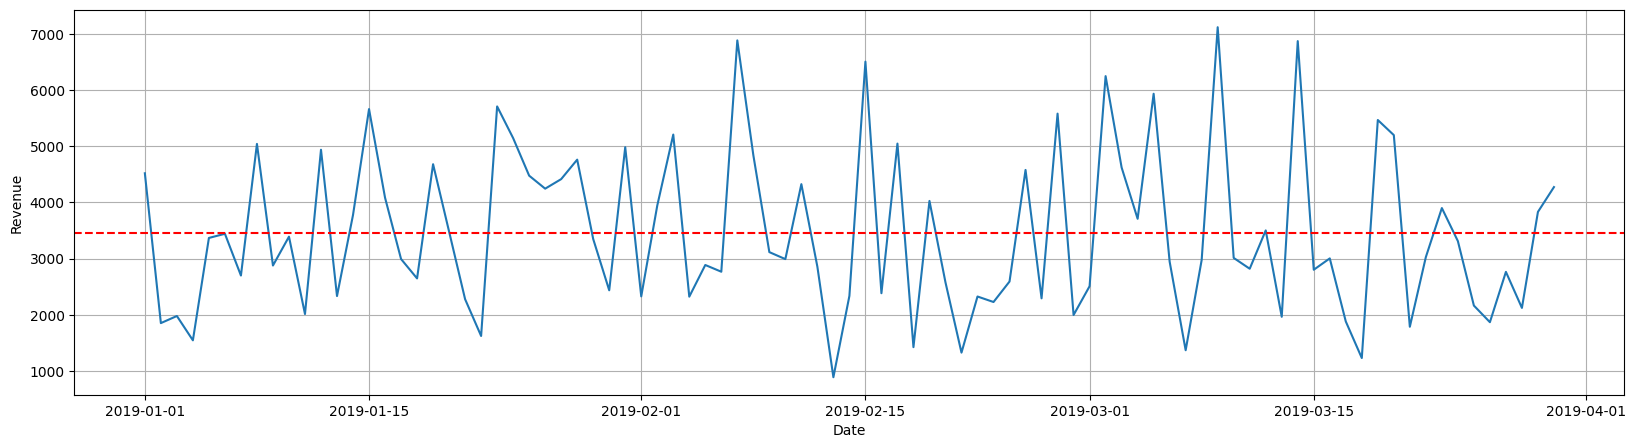

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
sns.lineplot(x= 'Date', y = 'Revenue', data=daily_avg)
plt.axhline(y= daily_avg['Revenue'].mean(), color='r', linestyle='--')
plt.grid()
#plt.xticks(rotation= 45)
#plt.show()

In [ ]:
print(daily_avg['Revenue'].max())
print(daily_avg['Revenue'].min())

7118.14
889.75


The highest company revenue was achieved on March 15, 2019, amounting to`$`7118.14 and the lowest company revenue was achieve on February 13, 2019, amounting to `$`889.75

#### Cumulative Revenue by City

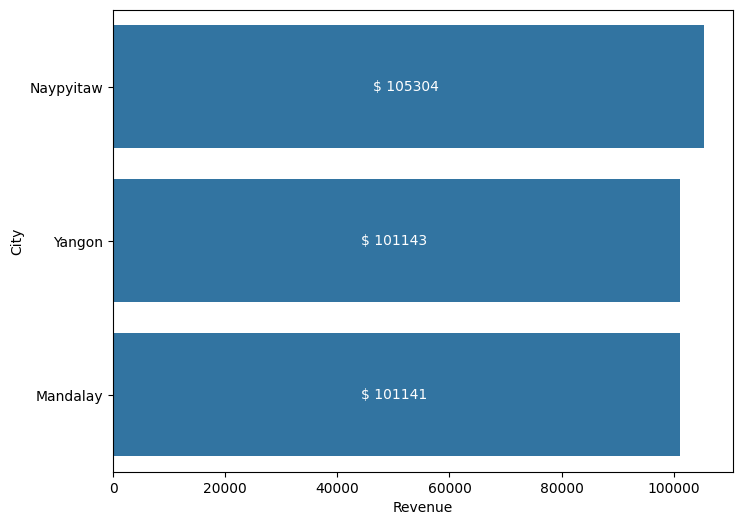

In [ ]:
plt.rcParams["figure.figsize"] = (8,6)
city_cum_rev = data.cleaned.groupby(['City']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
city_rev = sns.barplot(y=city_cum_rev.index, x='Revenue', data=city_cum_rev, orient='h',
            order=city_cum_rev.sort_values(by='Revenue', ascending=False).index)
city_rev.bar_label(city_rev.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
# fmt help us to add the $ symbol and can help us to add decimal to the string
plt.show()

We can conclude that Naypyitaw is the city with the highest revenue compared to the other two cities. From this, we should take another approach to see if there is a trend or a pattern in our sales.

#### Cumulative Revenue by City day by day

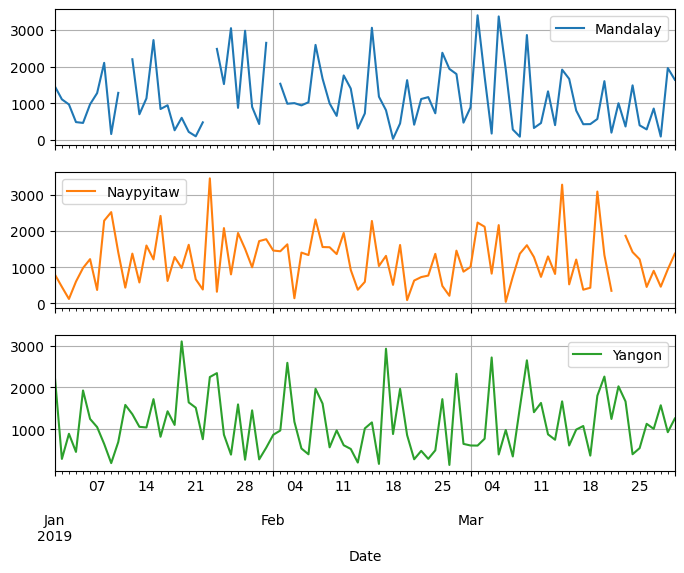

In [ ]:
pd.pivot_table(data.cleaned,
                      index='Date',
                      columns = 'City',
                      values='Revenue',
                      aggfunc='sum').plot(subplots = True,
                                          grid = True,
                                          legend = 1)
plt.show()

The highest revenue from Mandalay Branch was achieved on **March 2, 2019** and the lowest revenue from Mandalay Branch was achieved on **February 18, 2019**.

The highest revenue from Naypitaw Branch was achieved on **January 23, 2019** and the lowest revenue from Naypitaw Branch was achieved on **March 6, 2019**.

The highest revenue from Yangon Branch was achieved on **January 19, 2019** and the lowest revenue from Yangon Branch was achieved on **February 16, 2019**.

#### Product Line Revenue

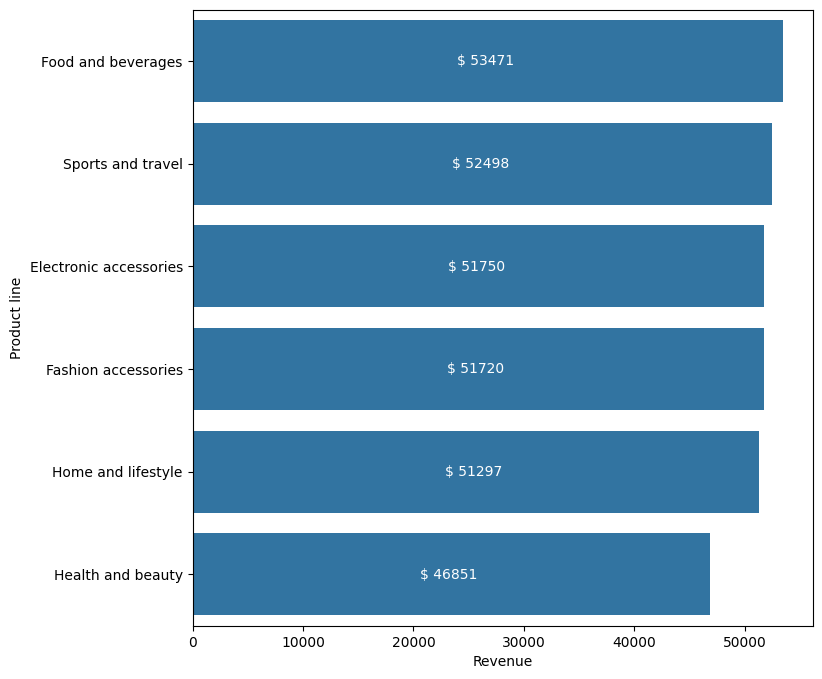

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
# Horizontal Barplot with an ordered revenue
prod_line = data.cleaned.groupby(['Product line']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
rev_prod = sns.barplot(y=prod_line.index, x='Revenue', data=prod_line, orient='h',
            order=prod_line.sort_values(by='Revenue', ascending=False).index)
rev_prod.bar_label(rev_prod.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
# fmt help us to add the $ symbol and can help us to add decimal to the string
plt.show()

Health and Beauty is the lowest Product line compared to other Product line.

#### Product Line Revenue from every city

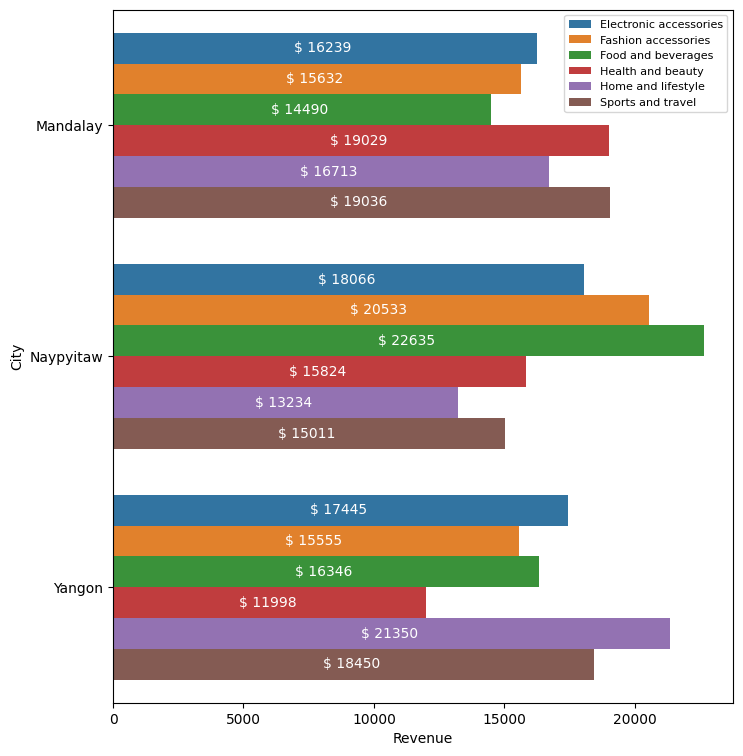

In [ ]:
prod_city = data.cleaned.groupby(['City', 'Product line']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
plt.rcParams["figure.figsize"] = (8,9)
rev_prod_city=sns.barplot(y='City', x='Revenue', data=prod_city, hue='Product line', orient='h')
rev_prod_city.bar_label(rev_prod_city.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
rev_prod_city.bar_label(rev_prod_city.containers[1], label_type='center', fmt='$ {:.0f} ', color='white')
rev_prod_city.bar_label(rev_prod_city.containers[2], label_type='center', fmt='$ {:.0f} ', color='white')
rev_prod_city.bar_label(rev_prod_city.containers[3], label_type='center', fmt='$ {:.0f} ', color='white')
rev_prod_city.bar_label(rev_prod_city.containers[4], label_type='center', fmt='$ {:.0f} ', color='white')
rev_prod_city.bar_label(rev_prod_city.containers[5], label_type='center', fmt='$ {:.0f} ', color='white')
plt.legend(loc='upper right', fontsize= 8)
plt.xticks(rotation= 0)
plt.show()


#### Product Line Quantity

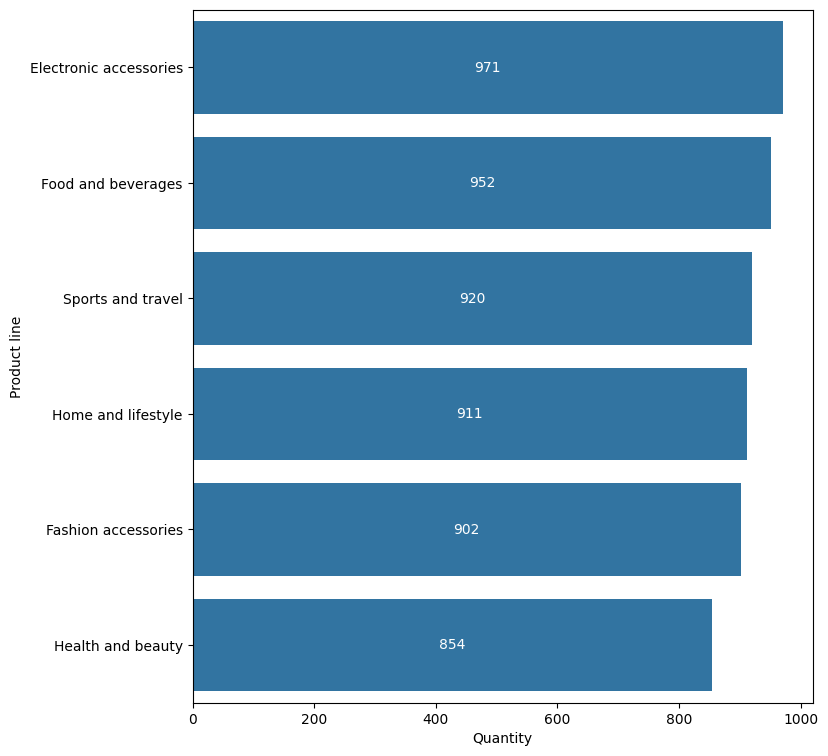

In [ ]:
quan_prod = sns.barplot(y=prod_line.index, x='Quantity', data=prod_line, orient='h',
            order=prod_line.sort_values(by='Quantity', ascending=False).index)
quan_prod.bar_label(quan_prod.containers[0], label_type='center', color='white')
# fmt help us to add the $ symbol and can help us to add decimal to the string
plt.show()

#### Quantity by Product Line from every city

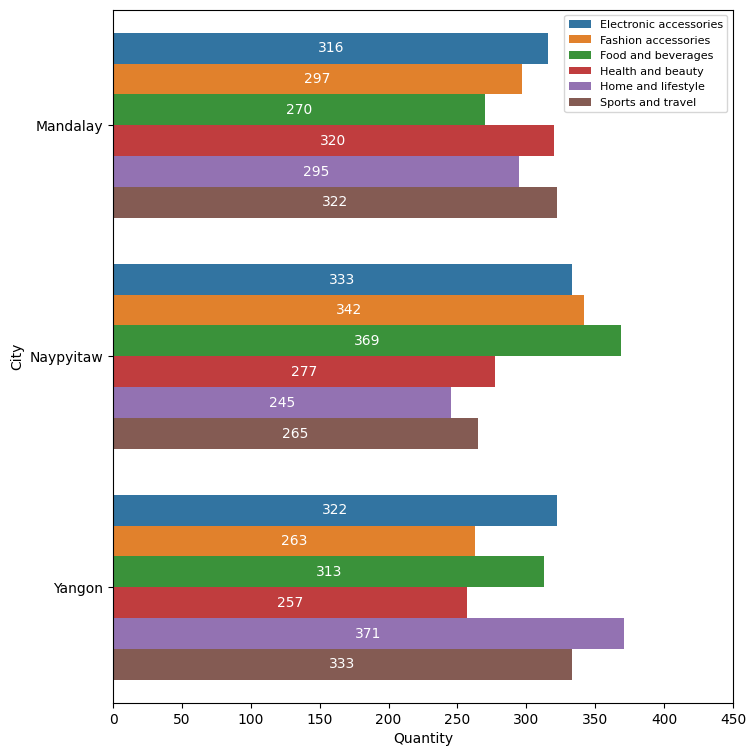

In [ ]:
quan_prod_city=sns.barplot(y='City', x='Quantity', data=prod_city, hue='Product line', orient='h')
quan_prod_city.bar_label(quan_prod_city.containers[0], label_type='center', color='white')
quan_prod_city.bar_label(quan_prod_city.containers[1], label_type='center', color='white')
quan_prod_city.bar_label(quan_prod_city.containers[2], label_type='center', color='white')
quan_prod_city.bar_label(quan_prod_city.containers[3], label_type='center', color='white')
quan_prod_city.bar_label(quan_prod_city.containers[4], label_type='center', color='white')
quan_prod_city.bar_label(quan_prod_city.containers[5], label_type='center', color='white')
plt.legend(loc='upper right', fontsize= 8)
plt.xlim(right=450)
plt.xticks(rotation= 0)
plt.show()

### Customer Segmentation

For customer segmentation, we can start from identifying Our customer profile with examples:
- Customer gender
- Customer payment type
- Customer type
- Customer behavior

When we cleansed the data, we can see that the number of **Female Customers** and the **Male Customers** just slightly different. So let's look at the Customer Expense

Customer gender from every city also didn't show a significant difference. Let's move on to understand Customer expense by Gender.

#### Customer Expense by Gender

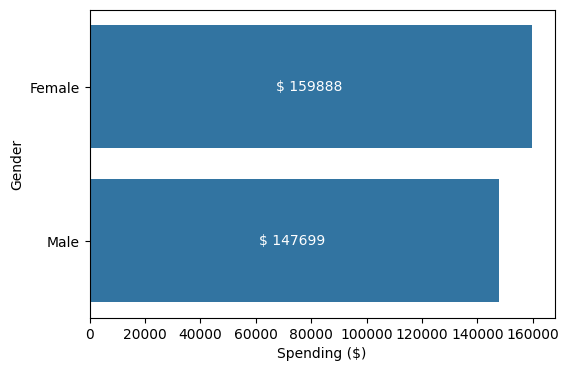

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
cust_gender_rev = data.cleaned.groupby(['Gender']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
gender_bar = sns.barplot(y=cust_gender_rev.index, x='Revenue', data=cust_gender_rev, orient='h')
gender_bar.bar_label(gender_bar.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
plt.xlabel("Spending ($)")
plt.show()

We can see that the Female Customer spent more than the Male Customer. Let's see which the Product Line is purchased more.

#### Customer Expense on Product Line by Gender

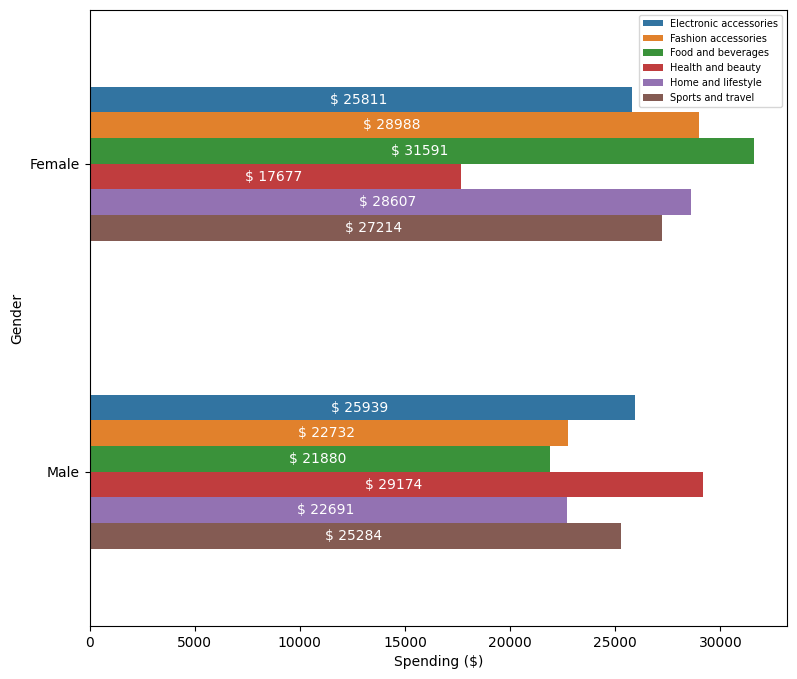

In [ ]:
plt.rcParams["figure.figsize"] = (9,8)
cust_gender_prodline = data.cleaned.groupby(['Gender', 'Product line']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
prodline_by_gender = sns.barplot(y='Gender', x='Revenue', data=cust_gender_prodline, hue='Product line', orient='h', width = 0.5)
prodline_by_gender.bar_label(prodline_by_gender.containers[0], label_type = 'center', fmt = '$ {:.0f} ', color='white')
prodline_by_gender.bar_label(prodline_by_gender.containers[1], label_type = 'center', fmt = '$ {:.0f} ', color='white')
prodline_by_gender.bar_label(prodline_by_gender.containers[2], label_type = 'center', fmt = '$ {:.0f} ', color='white')
prodline_by_gender.bar_label(prodline_by_gender.containers[3], label_type = 'center', fmt = '$ {:.0f} ', color='white')
prodline_by_gender.bar_label(prodline_by_gender.containers[4], label_type = 'center', fmt = '$ {:.0f} ', color='white')
prodline_by_gender.bar_label(prodline_by_gender.containers[5], label_type = 'center', fmt = '$ {:.0f} ', color='white')
plt.xlabel("Spending ($)")
plt.legend(loc='upper right', fontsize= 7)
plt.show()

We can see that both Female and Male Customer almost have the same amount spending on **Electronic Accessories Product Line** and have a big difference in **Health and Beauty Product Line**. Female Customer also have a higher spending on other **Product Line**. The next step, we need to understand what kind of payment method that most of our customer use.

#### Customer Payment type

In [ ]:
cust_payment = data.cleaned.groupby(['Payment']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
cust_payment

,Revenue,Quantity
Payment,,
Cash,106863.40,1896
Credit card,95968.64,1722
Ewallet,104755.34,1892


In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n(${:d} )".format(pct, absolute)

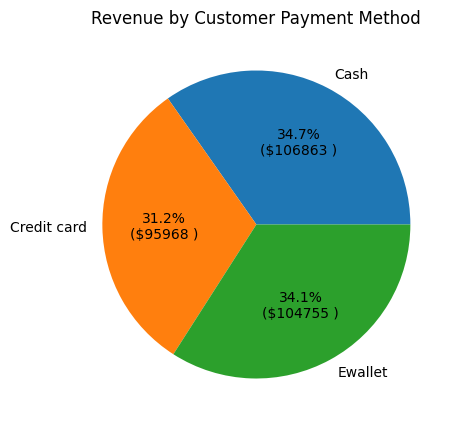

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(cust_payment['Revenue'], labels=cust_payment.index, autopct=lambda pct: func(pct, cust_payment['Revenue']))
plt.title('Revenue by Customer Payment Method')
plt.show()

**Credit card** is the payment method with the lowest revenue compared to other methods. The difference in the proportion of customers paying using **cash** and **e-wallet** methods is only 0.6% of the total revenue.

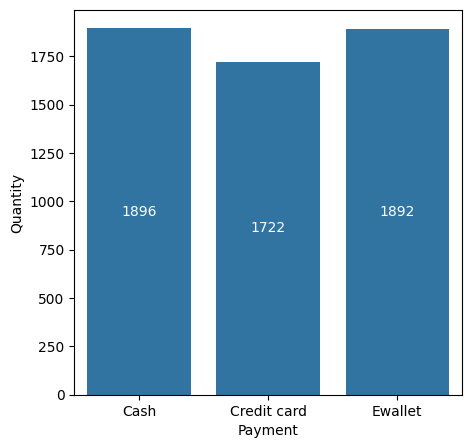

In [ ]:
payment_quant = sns.barplot(x=cust_payment.index, y='Quantity', data=cust_payment, orient= 'v')
payment_quant.bar_label(payment_quant.containers[0], label_type='center', color='white')
plt.show()

#### Payment Method by City

In [ ]:
payment_bycity = data.cleaned.groupby(['City', 'Payment']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
payment_bycity

Revenue  Quantity
City      Payment                        
Mandalay  Cash         33656.63       628
          Credit card  35566.53       599
          Ewallet      31917.48       593
Naypyitaw Cash         41034.15       696
          Credit card  28883.30       543
          Ewallet      35386.08       592
Yangon    Cash         32172.62       572
          Credit card  31518.81       580
          Ewallet      37451.78       707

In [ ]:
# NOT RELEVANT (We have Transactional Data, not personal data)

custtype_payment = pd.crosstab(data.cleaned['Customer type'], data.cleaned['Payment'])
custtype_payment.plot.bar(rot=0, figsize=(4,4)) #rot = rotation of x-axis text, figsize = size for the plot
plt.legend(loc='upper right', fontsize= 8) #loc = location of legend, fontsize = font size of legend
plt.ylim(top= 225) #set the y-axis limit to 225
plt.show()

#### Product Line by Customer Payment type

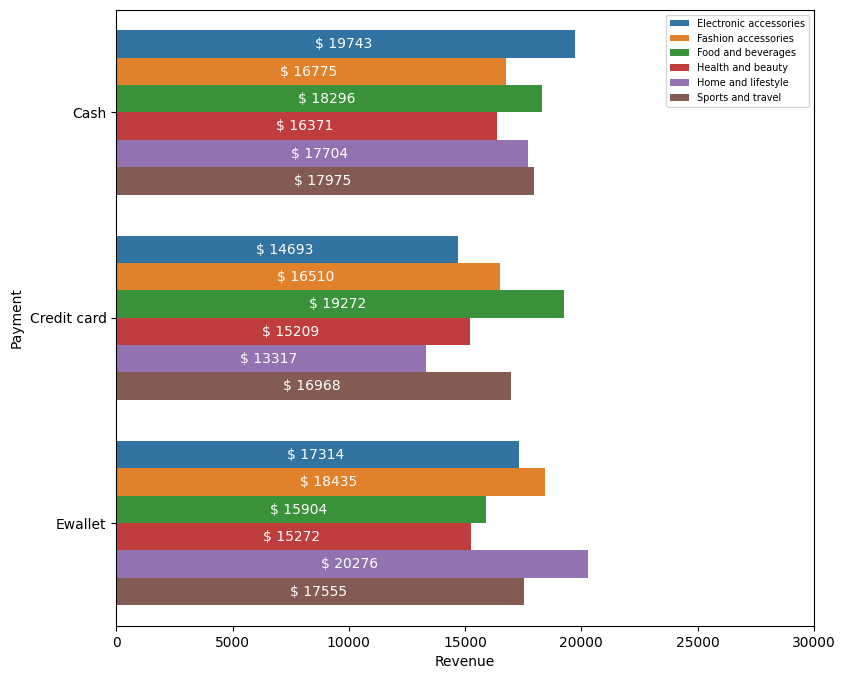

In [ ]:
plt.rcParams["figure.figsize"] = (9,8)
cust_type_prodline = data.cleaned.groupby(['Payment','Product line']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
cust_type_byproductline=sns.barplot(y='Payment', x='Revenue', data=cust_type_prodline, hue='Product line', orient='h')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[1], label_type='center', fmt='$ {:.0f} ', color='white')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[2], label_type='center', fmt='$ {:.0f} ', color='white')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[3], label_type='center', fmt='$ {:.0f} ', color='white')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[4], label_type='center', fmt='$ {:.0f} ', color='white')
cust_type_byproductline.bar_label(cust_type_byproductline.containers[5], label_type='center', fmt='$ {:.0f} ', color='white')
plt.legend(loc='upper right', fontsize= 7) #loc = location of legend, fontsize = font size of legend
plt.xlim(right= 30000) #set the y-axis limit to 225
plt.show()

The highest product line revenue that paid using **Cash** is **Electronic Accessories** (`$` 19743). The highest product line revenue that paid using **Credit Card** is **Food and Beverages** (`$` 19272). The highest product line revenue that paid using **E-Wallet** is **Home and Lifestyle** (`$` 20276).

In [ ]:
cust_gender_payment = data.cleaned.groupby(['Gender', 'Payment']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
cust_gender_payment

Revenue  Quantity
Gender Payment                        
Female Cash         56680.20      1004
       Credit card  50950.90       928
       Ewallet      52257.40       937
Male   Cash         50183.20       892
       Credit card  45017.74       794
       Ewallet      52497.94       955

#### Customer Payment by Gender

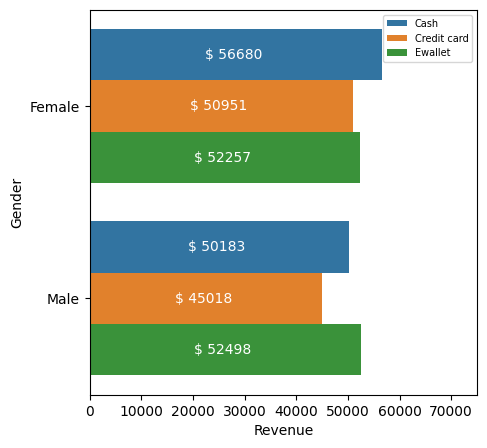

In [ ]:
cust_payment_bygender=sns.barplot(y='Gender', x='Revenue', data=cust_gender_payment, hue='Payment', orient='h')
cust_payment_bygender.bar_label(cust_payment_bygender.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
cust_payment_bygender.bar_label(cust_payment_bygender.containers[1], label_type='center', fmt='$ {:.0f} ', color='white')
cust_payment_bygender.bar_label(cust_payment_bygender.containers[2], label_type='center', fmt='$ {:.0f} ', color='white')
plt.legend(loc='upper right', fontsize= 7) #loc = location of legend, fontsize = font size of legend
plt.xlim(right= 75000) #set the y-axis limit to 225
plt.show()

The Female customer use **cash** as the highest payment method compared to other payment methods. The Male customer use **Ewallet** as the highest payment method compared to other payment methods.

In [ ]:
data.cleaned['Payment type - member'] = data.cleaned['Payment'] + ' - ' + data.cleaned['Customer type']

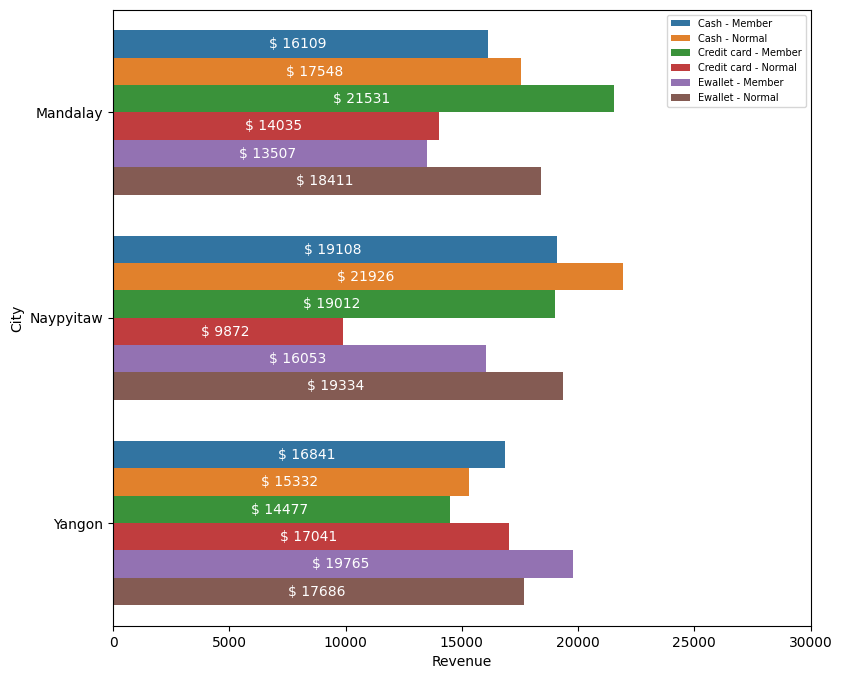

In [ ]:
plt.rcParams["figure.figsize"] = (9,8)
member_payment_bycity = data.cleaned.groupby(['City','Payment type - member']).agg({'Revenue' : 'sum',
                                              'Quantity': 'sum'})
member_payment_city=sns.barplot(y='City', x='Revenue', data=member_payment_bycity, hue='Payment type - member', orient='h')
member_payment_city.bar_label(member_payment_city.containers[0], label_type='center', fmt='$ {:.0f} ', color='white')
member_payment_city.bar_label(member_payment_city.containers[1], label_type='center', fmt='$ {:.0f} ', color='white')
member_payment_city.bar_label(member_payment_city.containers[2], label_type='center', fmt='$ {:.0f} ', color='white')
member_payment_city.bar_label(member_payment_city.containers[3], label_type='center', fmt='$ {:.0f} ', color='white')
member_payment_city.bar_label(member_payment_city.containers[4], label_type='center', fmt='$ {:.0f} ', color='white')
member_payment_city.bar_label(member_payment_city.containers[5], label_type='center', fmt='$ {:.0f} ', color='white')
plt.legend(loc='upper right', fontsize= 7) #loc = location of legend, fontsize = font size of legend
plt.xlim(right= 30000) #set the y-axis limit to 225
plt.show()

In **Mandalay City**, we can see that most of the **Member Customer** use **Credit card** more than other payment methods.